<a href="https://colab.research.google.com/github/dldbsrn0120/Car_Recognition/blob/master/vgg16_trainer_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install keras

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#install GapCV
!pip install -q gapcv

In [0]:
import gapcv
from gapcv.vision import Images
from gapcv.utils.img_tools import ImgUtils

In [0]:
from google.colab.patches import cv2_imshow

from keras_applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from keras.callbacks import ModelCheckpoint

from keras.models import Model

from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import ImageDataGenerator

from keras import models, layers
from keras import optimizers, initializers, regularizers, metrics

from glob import glob

import keras
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd

import os
import random

Using TensorFlow backend.


In [0]:
pre_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3), backend=keras.backend, layers=keras.layers, models=keras.models, utils=keras.utils)
pre_model.trainable = False
pre_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# add output layer for VGG16 output (4096 -> 1000 => 4096 -> 1000 -> 100)
additional_model = models.Sequential()
additional_model.add(pre_model)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(4096, activation='relu'))
additional_model.add(layers.Dense(1000, activation='relu'))
#additional_model.add(layers.Dropout(0.5))
#additional_model.add(layers.Dense(100, activation='softmax')) 
additional_model.add(layers.Dense(8, activation='softmax')) #test
 
additional_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              102764544 
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 8008      
Total params: 121,584,240
Trainable params: 106,869,552
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
'''from keras.models import Sequential

vgg_model = Sequential()
for layer in pre_model.layers:
    vgg_model.add(layer)
for layer in additional_model.layers:
    vgg_model.add(layer)
vgg_model.summary()'''

In [0]:
checkpoint = ModelCheckpoint(filepath="vgg_car_weight.hdf5",
                             monitor='loss',
                             mode='min',
                             save_best_only=True
                             )

additional_model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
#additional_model.compile(Adam(learning_rate), loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [0]:

train_dir = "/content/drive/My Drive/CarDatabaseShare/car_generator_test/train_set/"
test_dir = "/content/drive/My Drive/CarDatabaseShare/car_generator_test/test_set/"
val_dir = "/content/drive/My Drive/CarDatabaseShare/car_generator_test/valid_set/"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
 
# convert color image to grayscale image

# to-do

Found 3087 images belonging to 8 classes.
Found 1032 images belonging to 8 classes.


In [0]:
history = additional_model.fit_generator(train_generator, 
            steps_per_epoch=30, 
            epochs=30, 
            validation_data=val_generator, 
            validation_steps=10, 
            callbacks=[checkpoint])
 

Epoch 1/30
30/30 [==============================] - 308s 10s/step - loss: 2.0785 - acc: 0.1437 - val_loss: 2.0704 - val_acc: 0.1250
Epoch 2/30
30/30 [==============================] - 308s 10s/step - loss: 2.0781 - acc: 0.1461 - val_loss: 2.0770 - val_acc: 0.1187
Epoch 3/30
30/30 [==============================] - 299s 10s/step - loss: 2.0737 - acc: 0.1688 - val_loss: 2.0707 - val_acc: 0.1437
Epoch 4/30
30/30 [==============================] - 299s 10s/step - loss: 2.0686 - acc: 0.1708 - val_loss: 2.0667 - val_acc: 0.2375
Epoch 5/30
30/30 [==============================] - 301s 10s/step - loss: 2.0711 - acc: 0.1521 - val_loss: 2.0661 - val_acc: 0.1375
Epoch 6/30
30/30 [==============================] - 298s 10s/step - loss: 2.0728 - acc: 0.1229 - val_loss: 2.0664 - val_acc: 0.1000
Epoch 7/30
30/30 [==============================] - 155s 5s/step - loss: 2.0645 - acc: 0.1458 - val_loss: 2.0224 - val_acc: 0.1382
Epoch 8/30
30/30 [==============================] - 34s 1s/step - loss: 2.053

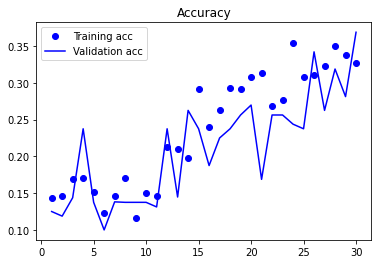

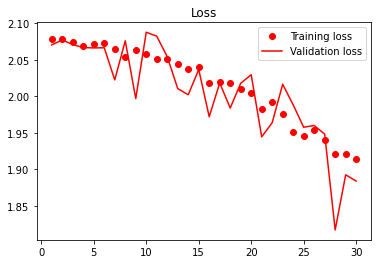

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()


In [10]:
import shutil

additional_model.save_weights("weights.h5")
print("Saved model to disk")

shutil.copy("weights.h5", "/content/drive/My Drive/CarDatabaseShare/" + "weights.h5")

Saved model to disk


'/content/drive/My Drive/CarDatabaseShare/weights.h5'

In [11]:
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')

scores = additional_model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(additional_model.metrics_names[1], scores[1]*100))

Found 1023 images belonging to 8 classes.
acc: 20.00%


In [0]:
### 여기까지 함 ###

50
100
150
200
250
300
350
400
450
500
550
600


386
255
(386, 1, 224, 224, 3)
(255, 1, 224, 224, 3)


AttributeError: ignored

In [0]:
#test_features = additional_model.predict(np.array(x_test_sq), batch_size=32, verbose=1)

255/255 [==============================] - 116s 454ms/step


In [0]:
'''np.savez("train_features", train_features, y_train)
np.savez("test_features", test_features, y_test)'''

In [0]:
'''print(train_features.shape)
print(test_features.shape)'''

(386, 10)
(255, 10)
[0.09982256 0.10010024 0.09978935 0.09990938 0.1001852  0.09982388
 0.09987855 0.10004623 0.10020854 0.10023609]


In [0]:
'''train_features_flat = np.reshape(train_features, (train_features.shape[0], 1*1*512))
test_features_flat = np.reshape(test_features, (test_features.shape[0], 1*1*512))'''

In [0]:
'''history = additional_model.fit(x_train_sq, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test_sq, y_test, batch_size=32)'''

In [0]:
'''#for i in x_test:
#test code
image = load_img(x_test[0], target_size=(224,224))
image = img_to_array(image)
print(image.shape)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
print(image.shape)
image = preprocess_input(image)
#yhat = additional_model.predict(image)
#print(yhat)
#label = decode_predictions(yhat)
#label = label[0][0]

#imagee = image
#imagee = imagee.reshape(imagee.shape[1],imagee.shape[2],imagee.shape[3])
#imagee = array_to_img(imagee)
#cv2_imshow(imagee)

#print('%s (%.2f%%)' % (label[1], label[2]*100))'''

(224, 224, 3)
(1, 224, 224, 3)


In [0]:
'''history = additional_model.fit(x_train, y_train, batch_size=32, epochs=10)'''
score = model.evaluate(x_test, y_test, batch_size=32)


In [0]:
print(len(x_train))
print(len(y_train))

import random
for_shuffle = [[x,y] for x, y in zip(x_train, y_train)]

random.shuffle(for_shuffle)
x_train = [n[0] for n in for_shuffle]
y_train = [n[1] for n in for_shuffle]
#for i in range(len(x_train)):
    #print(x_train[i] + ',' + str(y_train[i]))

3820
3820


In [0]:
# training dataset load (how to prepare training input values)
# input image to the model
'''
x_train_imgsrc = []
x_test_imgsrc = []
x_valid_imgsrc = []

x_train = []
x_test = []
x_valid = []

y_train = []
y_test = []
y_valid = []

img_path_csv = np.loadtxt("/content/drive/My Drive/CarDatabaseShare/retrieve_path_list.csv", delimiter=',', dtype='str')
for i in range(0, 10):
    print(img_path_csv[i][0])
    listdirr = os.listdir(img_path_csv[i][1])
    cnt = 0
    for j in listdirr:
        if cnt <= int(int(img_path_csv[i][2]) * 0.06): # just for test
            x_train_imgsrc.append(img_path_csv[i][1] + '/' + j)
            y_train.append(img_path_csv[i][0])
        elif cnt <= int(int(img_path_csv[i][2]) * 0.1):
            x_test_imgsrc.append(img_path_csv[i][1] + '/' + j)
            y_test.append(img_path_csv[i][0])
        ''''''if cnt <= int(int(img_path_csv[i][2]) * 0.6):
            x_train_imgsrc.append(img_path_csv[i][1] + '/' + j)
            y_train.append(img_path_csv[i][0])
        else:
            x_test_imgsrc.append(img_path_csv[i][1] + '/' + j)
            y_test.append(img_path_csv[i][0])''''''
        cnt += 1
    #print(cnt)
#print(x_train)
#print(y_train)
'''